In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
#importing the data
url1 = 'https://raw.githubusercontent.com/Pota1987/Data-Analytics-LSE/main/covid_19_uk_cases.csv'
UK_cases = pd.read_csv(url1, index_col = 0)
url2 = 'https://raw.githubusercontent.com/Pota1987/Data-Analytics-LSE/main/covid_19_uk_vaccinated.csv'
UK_vaccinated = pd.read_csv(url2, index_col = 0)
url3 = 'https://raw.githubusercontent.com/Pota1987/Data-Analytics-LSE/main/global_data.csv'
global_data = pd.read_csv(url3, index_col = 0)
url4 = 'https://raw.githubusercontent.com/Pota1987/Data-Analytics-LSE/main/tweets.csv'
tweets = pd.read_csv(url4, index_col = 0)
url6 = 'https://raw.githubusercontent.com/Pota1987/Data-Analytics-LSE/main/tweets_2.csv'
tweets_2 = pd.read_csv(url6, index_col = 0)
url5 = 'https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv'
continents = pd.read_csv(url5)

# "Global_Data" wrangling

In [2]:
#Number of columns and rows within the DataFrame global_data.shape
global_data.shape

(279, 635)

In [3]:
#Number of columns and rows within the DataFrame UK_cases
UK_cases.shape

(7584, 11)

In [4]:
#Number of columns and rows within the DataFrame UK_vaccinated
UK_vaccinated.shape

(7584, 10)

In [5]:
#what are the columns within global_data?
global_data.columns

Index(['Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       ...
       '10/5/21', '10/6/21', '10/7/21', '10/8/21', '10/9/21', '10/10/21',
       '10/11/21', '10/12/21', '10/13/21', '10/14/21'],
      dtype='object', length=635)

In [6]:
#Reducing the number of columns -> I want to group all dates in one column
df_g = global_data.melt(id_vars=['Country/Region', 'Lat', 'Long'],
                        var_name="Date", 
                        value_name="Cases")

In [7]:
#checking the shape of the new DataFrame
df_g.shape

(176328, 5)

In [8]:
#Count of null values within the DataFrame
df_g.isnull().sum()

Country/Region       0
Lat               1264
Long              1264
Date                 0
Cases                0
dtype: int64

In [9]:
#find the non NaN values
def nans(df_g): return df_g[df_g.isnull().any(axis=1)]
nans(df_g)

,Country/Region,Lat,Long,Date,Cases
52,Canada,NaN,NaN,1/22/20,0
88,China,NaN,NaN,1/22/20,0
331,Canada,NaN,NaN,1/23/20,0
367,China,NaN,NaN,1/23/20,0
610,Canada,NaN,NaN,1/24/20,0
...,...,...,...,...,...
175579,China,NaN,NaN,10/12/21,0
175822,Canada,NaN,NaN,10/13/21,13
175858,China,NaN,NaN,10/13/21,0
176101,Canada,NaN,NaN,10/14/21,13


In [10]:
#Checking what countries do not have the 'Long' data
NaNc = df_g[df_g['Lat'].isnull()]
df_gk = NaNc.Long.isnull().groupby([NaNc['Country/Region']]).sum().astype(int).reset_index(name='count')
df_gk

,Country/Region,count
0,Canada,632
1,China,632


In [11]:
#632 records from China and 632 records from Canada do not have the columns 'Lat' and 'Long' filled
NaNcd = df_g[df_g['Lat'].isnull()]
nn = NaNcd.Long.isnull().groupby([NaNc['Cases']]).sum().astype(int).reset_index(name='count')
nn

,Cases,count
0,0,933
1,1,3
2,2,2
3,13,325
4,37,1


In [12]:
#a few extra checks 
df_g["Country/Region"].value_counts()

China             21488
Canada            10112
United Kingdom     7584
France             7584
Australia          5056
                  ...  
Guatemala           632
Guinea              632
Guinea-Bissau       632
Guyana              632
Zimbabwe            632
Name: Country/Region, Length: 195, dtype: int64

In [13]:
df_g.dtypes

Country/Region     object
Lat               float64
Long              float64
Date               object
Cases               int64
dtype: object

In [14]:
#converting column Date into datetime 
df_g['Date'] = df_g['Date'].astype('datetime64')

In [15]:
#checking the result
df_g.dtypes

Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Cases                      int64
dtype: object

In [16]:
#check the new df
continents

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [17]:
#checking the duplicated
continents.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
189    False
190    False
191    False
192    False
193    False
Length: 194, dtype: bool

In [18]:
continents.columns

Index(['Continent', 'Country'], dtype='object')

In [19]:
#renaming the column I need to use to relate the two df's 
continents = continents.rename(columns={"Country": "Country/Region"})

In [20]:
#merine the two df's 
df_gc = pd.merge(df_g, continents, on='Country/Region', how='left')

In [21]:
df_gc

,Country/Region,Lat,Long,Date,Cases,Continent
0,Afghanistan,33.939110,67.709953,2020-01-22,0,Asia
1,Albania,41.153300,20.168300,2020-01-22,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,Africa
...,...,...,...,...,...,...
176323,Vietnam,14.058324,108.277199,2021-10-14,853842,Asia
176324,West Bank and Gaza,31.952200,35.233200,2021-10-14,446294,NaN
176325,Yemen,15.552727,48.516388,2021-10-14,9467,Asia
176326,Zambia,-13.133897,27.849332,2021-10-14,209431,Africa


In [22]:
#Checkin if there is any Country whithout Continent
df_gc['Continent'].isnull().sum()

11376

In [23]:
#Partial visualization of the 11376 Countries with a NaN Continents
NaN = df_gc[df_gc['Continent'].isnull()]
NaN

,Country/Region,Lat,Long,Date,Cases,Continent
33,Burkina Faso,12.238300,-1.561600,2020-01-22,0,NaN
34,Burma,21.916200,95.956000,2020-01-22,0,NaN
36,Cabo Verde,16.538800,-23.041800,2020-01-22,0,NaN
94,Congo (Brazzaville),-0.228000,15.827700,2020-01-22,0,NaN
95,Congo (Kinshasa),-4.038300,21.758700,2020-01-22,0,NaN
...,...,...,...,...,...,...
176266,Russia,61.524010,105.318756,2021-10-14,7773388,NaN
176289,Summer Olympics 2020,35.649100,139.773700,2021-10-14,865,NaN
176294,Taiwan*,23.700000,121.000000,2021-10-14,16321,NaN
176298,Timor-Leste,-8.874217,125.727539,2021-10-14,19696,NaN


In [24]:
#Creating a clear overview of what Coutnry/Region do not have a Continent
df2 = NaN.Continent.isnull().groupby([NaN['Country/Region']]).sum().astype(int).reset_index(name='count')
df2

,Country/Region,count
0,Burkina Faso,632
1,Burma,632
2,Cabo Verde,632
3,Congo (Brazzaville),632
4,Congo (Kinshasa),632
5,Cote d'Ivoire,632
6,Czechia,632
7,Diamond Princess,632
8,Eswatini,632
9,Holy See,632


#Checking the correct name of the countires within the DataFrame 'Continents'

In [25]:
continents[continents['Country/Region'].str.contains("Cong")]

,Continent,Country/Region
11,Africa,Congo
12,Africa,"Congo, Democratic Republic of"


In [26]:
continents[continents['Country/Region'].str.contains("Iv")]

,Continent,Country/Region
23,Africa,Ivory Coast


In [27]:
continents[continents['Country/Region'].str.contains("Czech")]

,Continent,Country/Region


In [28]:
continents[continents['Country/Region'].str.contains("Mac")]

,Continent,Country/Region
125,Europe,Macedonia


In [29]:
continents[continents['Country/Region'].str.contains("Rus")]

,Continent,Country/Region
85,Asia,Russian Federation


In [30]:
continents[continents['Country/Region'].str.contains("ROY")]

,Continent,Country/Region


In [31]:
continents[continents['Country/Region'].str.contains("Ca")]

,Continent,Country/Region
6,Africa,Cameroon
7,Africa,Cape Verde
60,Asia,Cambodia
149,North America,Canada


In [32]:
continents[continents['Country/Region'].str.contains("Bur")]

,Continent,Country/Region
4,Africa,Burkina
5,Africa,Burundi
59,Asia,Burma (Myanmar)


In [33]:
continents[continents['Country/Region'].str.contains("Tai")]

,Continent,Country/Region


In [34]:
#Renaming the Country/Region in the original DataFrame

In [35]:
df_g['Country/Region'] = df_g['Country/Region'].replace(['Burkina Faso'],'Burkina')
df_g['Country/Region'] = df_g['Country/Region'].replace(['Macedonia'],'North Macedonia')
df_g['Country/Region'] = df_g['Country/Region'].replace(['Russia'],'Russian Federation')
df_g['Country/Region'] = df_g['Country/Region'].replace(['Cabo Verde'],'Cape Verde')
df_g['Country/Region'] = df_g['Country/Region'].replace(['Congo (Brazzaville)'],'Congo, Democratic Republic of')
df_g['Country/Region'] = df_g['Country/Region'].replace(['Congo (Kinshasa)'],'Congo, Democratic Republic of')
df_g['Country/Region'] = df_g['Country/Region'].replace(['Burma'],'Burma (Myanmar)')

In [36]:
#Merging again the two DataFrames
df_gcn = pd.merge(df_g, continents, on='Country/Region', how='inner')

In [37]:
#Checking
NaN = df_gcn[df_gcn['Continent'].isnull()]
NaN

,Country/Region,Lat,Long,Date,Cases,Continent


In [38]:
c = df_gcn["Country/Region"].value_counts()
c

China             21488
Canada            10112
United Kingdom     7584
France             7584
Australia          5056
                  ...  
Guinea              632
Guinea-Bissau       632
Guyana              632
Haiti               632
Zimbabwe            632
Name: Country/Region, Length: 182, dtype: int64

In [39]:
#Countries with more than 632 records
print (c[c > 632])

China                            21488
Canada                           10112
United Kingdom                    7584
France                            7584
Australia                         5056
Netherlands                       3160
Denmark                           1896
New Zealand                       1264
Congo, Democratic Republic of     1264
Name: Country/Region, dtype: int64


In [40]:
#Total Cases / Continent / Day
newk = df_gcn.groupby(['Date', 'Continent'])['Cases'].aggregate('max').unstack()
newk

Continent,Africa,Asia,Europe,North America,Oceania,South America
Date,,,,,,
2020-01-22,0,444,0,1,0,0
2020-01-23,0,444,0,1,0,0
2020-01-24,0,549,2,2,0,0
2020-01-25,0,761,3,2,0,0
2020-01-26,0,1058,3,5,3,0
...,...,...,...,...,...,...
2021-10-10,2912145,33971607,8154306,44340183,69205,21575820
2021-10-11,2912346,33985920,8193769,44456385,69552,21582738
2021-10-12,2912938,34001743,8231437,44562693,69993,21590097


In [41]:
newk.reset_index(inplace=True)

In [42]:
newk

Continent,Date,Africa,Asia,Europe,North America,Oceania,South America
0,2020-01-22,0,444,0,1,0,0
1,2020-01-23,0,444,0,1,0,0
2,2020-01-24,0,549,2,2,0,0
3,2020-01-25,0,761,3,2,0,0
4,2020-01-26,0,1058,3,5,3,0
...,...,...,...,...,...,...,...
627,2021-10-10,2912145,33971607,8154306,44340183,69205,21575820
628,2021-10-11,2912346,33985920,8193769,44456385,69552,21582738
629,2021-10-12,2912938,34001743,8231437,44562693,69993,21590097
630,2021-10-13,2913880,34020730,8272883,44684150,70391,21597949


In [43]:
trick = newk.melt(id_vars=['Date'],
                        var_name="Continent", 
                        value_name="Cases")

In [44]:
trick

,Date,Continent,Cases
0,2020-01-22,Africa,0
1,2020-01-23,Africa,0
2,2020-01-24,Africa,0
3,2020-01-25,Africa,0
4,2020-01-26,Africa,0
...,...,...,...
3787,2021-10-10,South America,21575820
3788,2021-10-11,South America,21582738
3789,2021-10-12,South America,21590097
3790,2021-10-13,South America,21597949


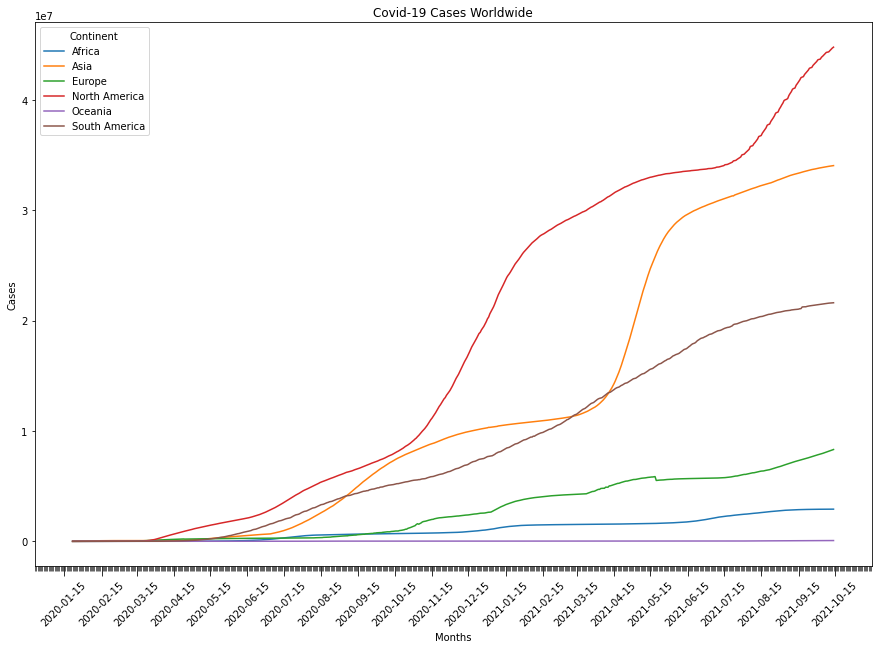

In [45]:
#Overall view ---- Covid cases worldwide

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 10))

# set up the plot
sns.lineplot(ax = ax, x='Date', y='Cases', data=trick, ci = None, hue = "Continent").set_title('Covid-19 Cases Worldwide')

# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=15))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Months')
plt.ylabel('Cases')

# show the plot
plt.show()

In [46]:
# What the total vaccinations are for a particular region within the UK? 

In [47]:
#checking the data relevant to the UK in the first df (global data)
Uk_cases2 = df_g[df_g['Country/Region'] == 'United Kingdom']
Uk_cases2.shape

(7584, 5)

In [48]:
#checking the data relevant to the UK in the secon df(UK_cases)
UK_cases.shape

(7584, 11)

In [49]:
UK_v = UK_vaccinated.reset_index()

In [50]:
UK_v["Province/State"].value_counts()

Anguilla                                        632
Bermuda                                         632
British Virgin Islands                          632
Cayman Islands                                  632
Channel Islands                                 632
Falkland Islands (Malvinas)                     632
Gibraltar                                       632
Isle of Man                                     632
Montserrat                                      632
Saint Helena, Ascension and Tristan da Cunha    632
Turks and Caicos Islands                        632
Others                                          632
Name: Province/State, dtype: int64

In [51]:
UK_vaccinated.columns

Index(['Country/Region', 'Lat', 'Long', 'ISO 3166-1 Alpha 3-Codes',
       'Sub-region Name', 'Intermediate Region Code', 'Date', 'Vaccinated',
       'First Dose', 'Second Dose'],
      dtype='object')

In [52]:
UK_vaccinated_pivot = pd.pivot_table(UK_vaccinated, index = "Province/State", values = ["First Dose", 
                                                                                        "Second Dose", 
                                                                                        "Vaccinated"], aggfunc = "max")
UK_vaccinated_pivot

,First Dose,Second Dose,Vaccinated
Province/State,,,
Anguilla,78992,58480,58480
Bermuda,45138,33417,33417
British Virgin Islands,82754,61265,61265
Cayman Islands,56423,41771,41771
Channel Islands,52662,38987,38987
Falkland Islands (Malvinas),60185,44556,44556
Gibraltar,94038,69619,69619
Isle of Man,67708,50126,50126
Montserrat,86515,64049,64049


In [53]:
#area(s) with the largest number of people who have received a first dose but no second dose 

In [54]:
UK_vaccinated_pivot['Only first Dose'] = UK_vaccinated_pivot['First Dose'] - UK_vaccinated_pivot['Second Dose']

In [55]:
h = UK_vaccinated_pivot.sort_values(by=('Only first Dose'),ascending=False)
h

,First Dose,Second Dose,Vaccinated,Only first Dose
Province/State,,,,
Gibraltar,94038,69619,69619,24419
Montserrat,86515,64049,64049,22466
British Virgin Islands,82754,61265,61265,21489
Anguilla,78992,58480,58480,20512
Isle of Man,67708,50126,50126,17582
Falkland Islands (Malvinas),60185,44556,44556,15629
Cayman Islands,56423,41771,41771,14652
Channel Islands,52662,38987,38987,13675
Turks and Caicos Islands,48900,36202,36202,12698


In [56]:
df_t = h.reset_index()

In [57]:
df_t

,Province/State,First Dose,Second Dose,Vaccinated,Only first Dose
0,Gibraltar,94038,69619,69619,24419
1,Montserrat,86515,64049,64049,22466
2,British Virgin Islands,82754,61265,61265,21489
3,Anguilla,78992,58480,58480,20512
4,Isle of Man,67708,50126,50126,17582
5,Falkland Islands (Malvinas),60185,44556,44556,15629
6,Cayman Islands,56423,41771,41771,14652
7,Channel Islands,52662,38987,38987,13675
8,Turks and Caicos Islands,48900,36202,36202,12698
9,Bermuda,45138,33417,33417,11721


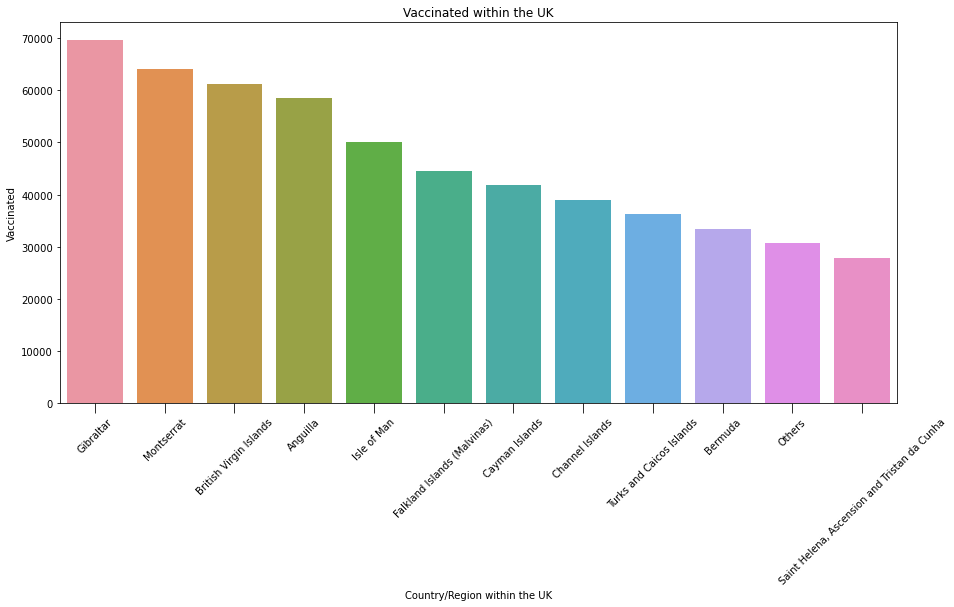

In [58]:
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.barplot(ax = ax, x='Province/State', y='Vaccinated', data=df_t).set_title('Vaccinated within the UK')

# (optional) rotate by 45° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Country/Region within the UK')
plt.ylabel('Vaccinated')

# show the plot
plt.show()

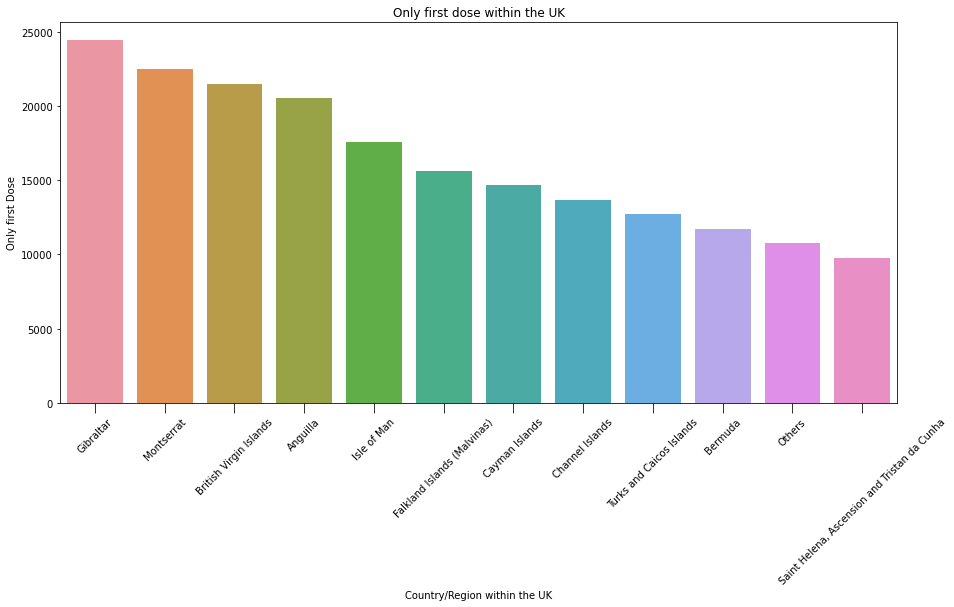

In [59]:
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.barplot(ax = ax, x='Province/State', y='Only first Dose', data=df_t).set_title('Only first dose within the UK')

# (optional) rotate by 45° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Country/Region within the UK')
plt.ylabel('Only first Dose')

# show the plot
plt.show()

In [60]:
#which area has the greatest number of recoveries 

In [61]:
UK_cases_pivot = pd.pivot_table(UK_cases, index = "Province/State", values = ["Recovered"], aggfunc = "max")

In [62]:
rec = UK_cases_pivot.sort_values(by=('Recovered'),ascending=False)
rec

,Recovered
Province/State,
Channel Islands,8322.0
Gibraltar,4670.0
Isle of Man,4019.0
Bermuda,2503.0
Turks and Caicos Islands,2433.0
British Virgin Islands,1914.0
Cayman Islands,635.0
Others,344.0
Anguilla,111.0


In [63]:
df_ri = rec.reset_index()

In [64]:
df_ri

,Province/State,Recovered
0,Channel Islands,8322.0
1,Gibraltar,4670.0
2,Isle of Man,4019.0
3,Bermuda,2503.0
4,Turks and Caicos Islands,2433.0
5,British Virgin Islands,1914.0
6,Cayman Islands,635.0
7,Others,344.0
8,Anguilla,111.0
9,Falkland Islands (Malvinas),63.0


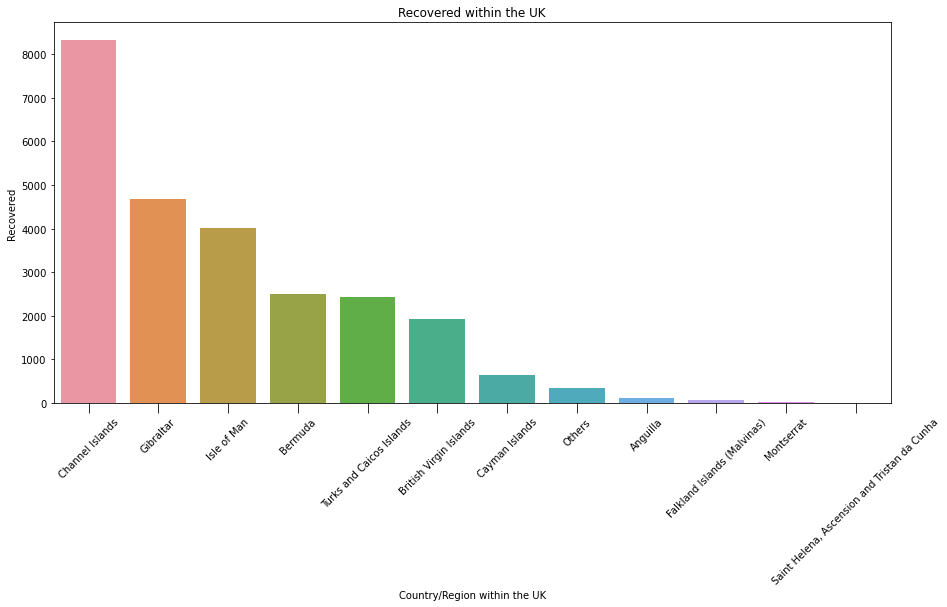

In [65]:
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.barplot(ax = ax, x='Province/State', y='Recovered', data=df_ri).set_title('Recovered within the UK')

# (optional) rotate by 45° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Country/Region within the UK')
plt.ylabel('Recovered')

# show the plot
plt.show()

In [66]:
a = pd.read_csv('covid_19_uk_cases.csv')

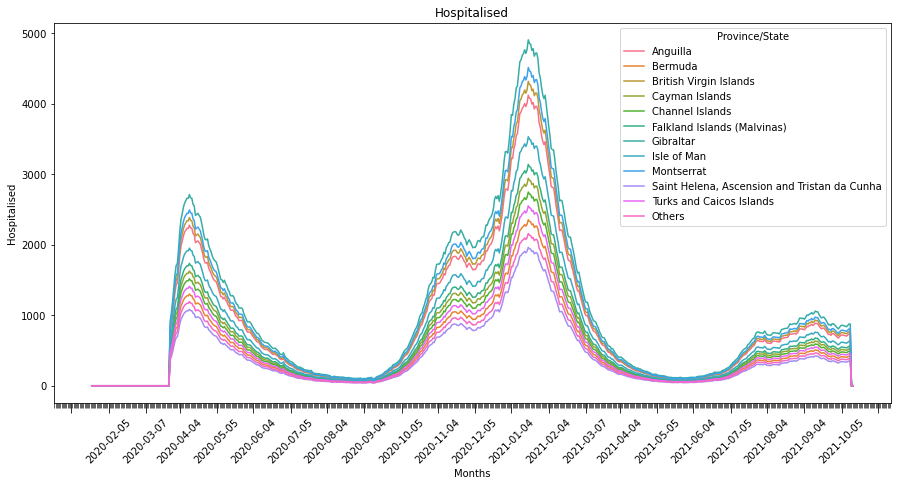

In [67]:
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.lineplot(ax = ax, x='Date', y='Hospitalised', data=a, ci = None, hue = 'Province/State').set_title('Hospitalised')
# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=15))
# specify the format of the labels as 'year-month-day'

# (optional) rotate by 45° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Months')
plt.ylabel('Hospitalised')

# show the plot
plt.show()

In [68]:
tweets.shape

(15, 30)

In [69]:
tweets_2.shape

(100, 28)

In [70]:
tweets.columns.difference(tweets_2.columns).tolist()

['created_at', 'retweeted_status']

In [71]:
tweetsA = tweets.drop(['retweeted_status'], axis=1)

In [72]:
tweetsA.columns.difference(tweets_2.columns).tolist()

['created_at']

In [73]:
tweets_2

,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
created_at,,,,,,,,,,,,,,,,,,,,,
Mon Mar 21 21:45:28 +0000 2022,1506024218571464717,1506024218571464717,@Johnrashton47 When #diabetes has been the big...,True,"{'hashtags': [{'text': 'diabetes', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.505660e+18,1.505660e+18,499455731.0,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
Mon Mar 21 21:31:13 +0000 2022,1506020629849391104,1506020629849391104,Disturbing figures from @fsb_policy @indparltr...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,4,3,False,False,en,False,NaN,NaN,NaN,NaN
Mon Mar 21 19:04:53 +0000 2022,1505983803822592004,1505983803822592004,NEW: #Stormont MLAs voted 57 ~ 25 to extend Do...,True,"{'hashtags': [{'text': 'Stormont', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,2,9,False,False,en,False,NaN,NaN,NaN,NaN
Mon Mar 21 18:39:58 +0000 2022,1505977533841481731,1505977533841481731,I'm do sick of coming on twitter to see the sa...,True,"{'hashtags': [{'text': 'borisOut', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
Mon Mar 21 18:23:08 +0000 2022,1505973299502850052,1505973299502850052,The rollout of new #COVID19 #Booster jabs to #...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,...,0,1,False,False,en,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fri Mar 18 11:43:35 +0000 2022,1504785582656008202,1504785582656008202,#CovidIsNotOver #COVID19 #coronavirus #Omicron...,True,"{'hashtags': [{'text': 'CovidIsNotOver', 'indi...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,1,0,False,False,und,False,1.504715e+18,1.504715e+18,{'created_at': 'Fri Mar 18 07:03:00 +0000 2022...,NaN
Fri Mar 18 11:32:16 +0000 2022,1504782734924918830,1504782734924918830,"The sun is shining. The doors are open, it’s n...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
Fri Mar 18 11:31:50 +0000 2022,1504782625491333123,1504782625491333123,@joeldommett @ZoeTheBall @kylieminogue so all...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,62926027.0,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN


In [74]:
tweets_2A = tweets_2.reset_index()

In [75]:
#Concatenating the two DataFrames
tweetstot = pd.concat([tweetsA, tweets_2A], axis=0)

In [76]:
tweetstot.shape

(115, 29)

In [77]:
tweetstot1 = tweetstot[tweetstot.text.str.contains(r'(?=.*#coronavirus)') | tweetstot.text.str.contains(r'(?=.*#vaccinated)')]

In [78]:
tweetstot1

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
2,Sun Mar 13 22:35:43 +0000 2022,1503137759002693634,1503137759002693634,Former President Barack #Obama has tested #pos...,True,"{'hashtags': [{'text': 'Obama', 'indices': [24...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,0,False,False,en,False,NaN,NaN,NaN,NaN
5,Sun Mar 13 22:32:21 +0000 2022,1503136912403480580,1503136912403480580,Available #vaccines have been designed against...,True,"{'hashtags': [{'text': 'vaccines', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0,2,False,False,en,False,1.503109e+18,1.503109e+18,{'created_at': 'Sun Mar 13 20:41:42 +0000 2022...,NaN
12,Sun Mar 13 22:27:29 +0000 2022,1503135688325312517,1503135688325312517,#China’s government has responded to a sharp r...,True,"{'hashtags': [{'text': 'China', 'indices': [0,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0,0,False,False,en,False,NaN,NaN,NaN,NaN
39,Sun Mar 20 11:24:32 +0000 2022,1505505564356485121,1505505564356485121,"Did well to last 2 years, I blame f**king Gool...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,4,False,False,en,False,NaN,NaN,NaN,"{'media': [{'id': 1505505560959102976, 'id_str..."
70,Sat Mar 19 09:32:03 +0000 2022,1505114871486205952,1505114871486205952,Feel more myself. #fuckcovid #COVID19 #corona...,False,"{'hashtags': [{'text': 'fuckcovid', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1,3,False,False,en,False,NaN,NaN,NaN,"{'media': [{'id': 1505114860673196032, 'id_str..."
95,Fri Mar 18 11:43:35 +0000 2022,1504785582656008202,1504785582656008202,#CovidIsNotOver #COVID19 #coronavirus #Omicron...,True,"{'hashtags': [{'text': 'CovidIsNotOver', 'indi...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1,0,False,False,und,False,1.504715e+18,1.504715e+18,{'created_at': 'Fri Mar 18 07:03:00 +0000 2022...,NaN


In [79]:
italy = df_gcn[df_gcn["Country/Region"] == "Italy"]
italy

,Country/Region,Lat,Long,Date,Cases,Continent
93536,Italy,41.87194,12.56738,2020-01-22,0,Europe
93537,Italy,41.87194,12.56738,2020-01-23,0,Europe
93538,Italy,41.87194,12.56738,2020-01-24,0,Europe
93539,Italy,41.87194,12.56738,2020-01-25,0,Europe
93540,Italy,41.87194,12.56738,2020-01-26,0,Europe
...,...,...,...,...,...,...
94163,Italy,41.87194,12.56738,2021-10-10,4700316,Europe
94164,Italy,41.87194,12.56738,2021-10-11,4701832,Europe
94165,Italy,41.87194,12.56738,2021-10-12,4704318,Europe
94166,Italy,41.87194,12.56738,2021-10-13,4707087,Europe


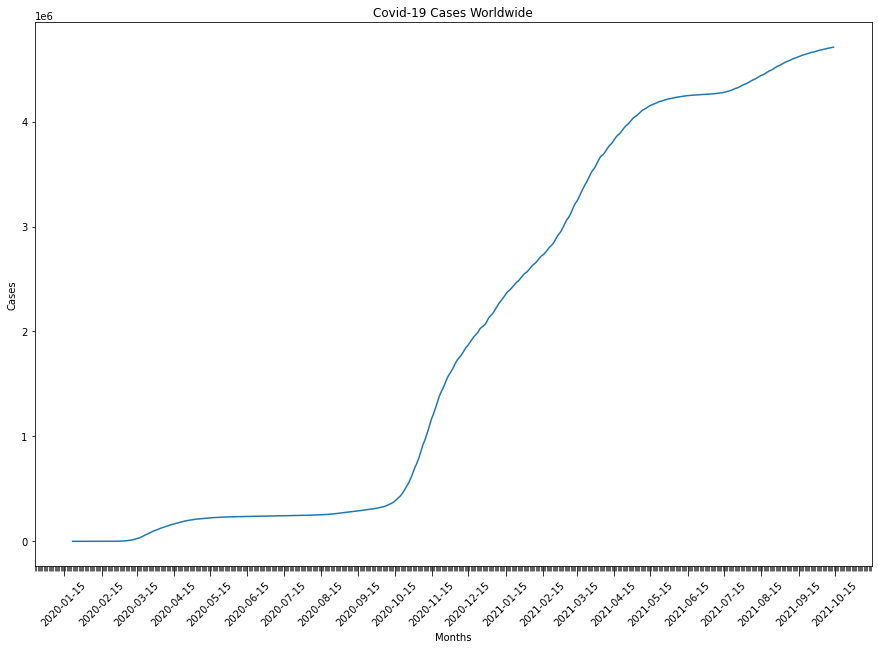

In [80]:
#Overall view ---- Covid cases in Italy

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 10))

# set up the plot
sns.lineplot(ax = ax, x='Date', y='Cases', data=italy).set_title('Covid-19 Cases Worldwide')

# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=15))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Months')
plt.ylabel('Cases')

# show the plot
plt.show()